# Bibliotecas

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Dataset

### Importar e Explorar Dataset

Training: 60000
Test: 10000


Text(0.5, 1.0, '9')

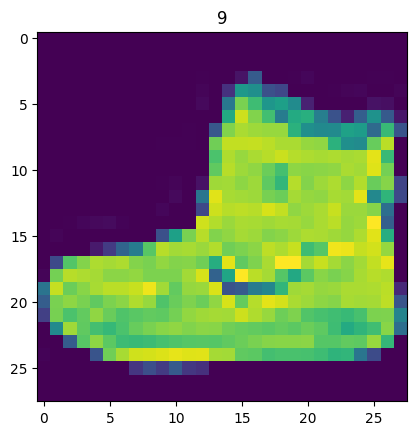

In [2]:
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

print(f"Training: {len(x_train)}\nTest: {len(x_test)}")

plt.imshow(x_train[0])
plt.title(y_train[0])

### Exibir Dataset

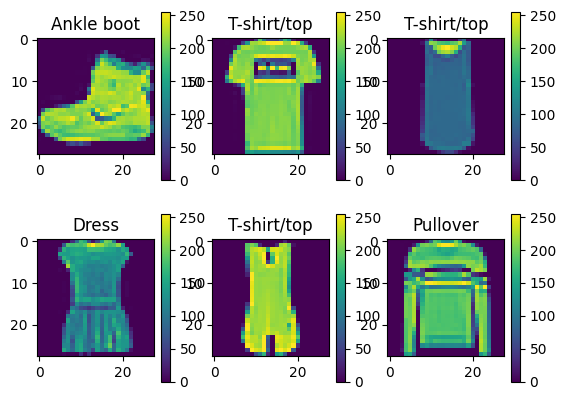

In [3]:
total_y = len(np.unique(y_train))
show_images = 6

clothing_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

for img in range(show_images):
    cols = show_images / 2
    lines = show_images / cols
    plt.subplot(int(lines), int(cols), img + 1)
    plt.imshow(x_train[img])
    plt.colorbar()
    plt.title(clothing_dict[y_train[img]])

# Definição de Camadas, Compilação e Treinamento

<p align="center">
  <img src="https://i.imgur.com/VXBAdZf.png" alt="Model1"/>
</p>

<p align="center">
  <img src="https://i.imgur.com/2cqUurB.png" alt="Model2"/>
</p>

<p align="center">
  <img src="https://i.imgur.com/wsr9RlT.png" alt="Model3"/>
</p>

<p align="center">
  <img src="https://i.imgur.com/OfRhvF8.png" alt="Model4"/>
</p>

<p align="center">
  <img src="https://i.imgur.com/UzWrcXV.png" alt="Model5"/>
</p>

<p align="center">
  <img src="https://i.imgur.com/UN0Ze7Q.png" alt="Model5"/>
</p>

In [29]:
x_train = x_train / float(
    255
)  # Normalização dos Dados de Treino. Deixar valores de 0 a 1.

model = keras.Sequential(
    [
        keras.layers.Flatten(
            input_shape=(28, 28)
        ),  # Camada de Entrada. Achatamento das Imagens
        keras.layers.Dense(
            256, activation=tensorflow.nn.relu
        ),  # Todos os números negativos viram 0. Os positivos se mantém. Função Não-Linear. (Unidade Linear Retificada). Camada Oculta.
        # keras.layers.Dense(128, activation=tensorflow.nn.relu), # Todos os números negativos viram 0. Os positivos se mantém. Função Não-Linear. (Unidade Linear Retificada). Camada Oculta.
        # keras.layers.Dense(64, activation=tensorflow.nn.relu), # Todos os números negativos viram 0. Os positivos se mantém. Função Não-Linear. (Unidade Linear Retificada). Camada Oculta.
        keras.layers.Dropout(0.2),  # Deixa Neurônios dormentes. Tipo de Normalização.
        keras.layers.Dense(
            10, activation=tensorflow.nn.softmax
        ),  # Cria probabilidades para cada categoria. (0 a 1). Camada de Saída.
    ]
)

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss"),
             keras.callbacks.ModelCheckpoint(filepath="best_model", monitor="val_loss", save_best_only=True)
             ]

adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=480, callbacks=callbacks)

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1004INFO:tensorflow:Assets written to: best_model.hf5\assets


INFO:tensorflow:Assets written to: best_model.hf5\assets


100/100 [==============================] - 1s 10ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.0957
Epoch 2/5
100/100 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.0957


## Análise do Modelo

### Resumo

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Pesos e Vieses

As redes neurais são inspiradas pelo funcionamento do cérebro humano e consistem em uma série de "neurônios" conectados entre si. Cada conexão entre esses neurônios está associada a um valor numérico chamado "peso". Esses pesos são fundamentais para o funcionamento das redes neurais, uma vez que determinam a importância relativa de cada entrada para a saída produzida pela rede.

- Inicialização: Quando uma rede neural é inicialmente construída, os pesos são geralmente atribuídos aleatoriamente (ou por alguma regra pré-definida, como a inicialização de He ou Xavier). Isso é feito porque o algoritmo de aprendizado da rede precisa de um ponto de partida.

- Multiplicação e soma: Quando a rede neural recebe uma entrada, cada entrada é multiplicada pelo peso correspondente. Então, todos esses produtos são somados para gerar a saída do neurônio.

- Função de ativação: A saída do neurônio passa por uma função de ativação, que é uma função não-linear. A função de ativação pode ser qualquer coisa, desde uma função simples como a função sigmoide ou ReLU (Rectified Linear Unit), até funções mais complexas. O objetivo da função de ativação é introduzir não-linearidades no modelo, permitindo que a rede neural aprenda a partir de dados complexos e não lineares.

- Retropropagação e ajuste dos pesos: A rede aprende ajustando os pesos. Durante a fase de treinamento, a rede neural gera previsões e compara essas previsões com os valores reais usando uma função de custo ou perda. A diferença entre a previsão e o valor real é usada para ajustar os pesos por meio de um processo chamado retropropagação, que é basicamente uma aplicação do algoritmo de gradiente descendente. Os pesos são ajustados de tal maneira que a diferença entre a previsão e o valor real (ou seja, o erro) é minimizada.

- Iteração: Este processo de feedforward (passagem dos dados da entrada para a saída), cálculo do erro, retropropagação e ajuste dos pesos é repetido muitas vezes — potencialmente milhares ou milhões de vezes — até que a rede tenha "aprendido" e os pesos sejam otimizados para fazer previsões precisas.

Os pesos, portanto, são os elementos críticos de uma rede neural que determinam o que a rede aprende a partir dos dados de entrada. Eles são continuamente ajustados durante o treinamento para minimizar o erro e melhorar a precisão da rede.

-------

Os vieses, assim como os pesos, são parâmetros importantes em uma rede neural que são aprendidos e ajustados durante o treinamento. Enquanto os pesos determinam a influência de uma entrada em particular na saída, os vieses permitem ajustar a saída do neurônio independentemente de suas entradas.

- Inicialização: Assim como os pesos, os vieses também são inicializados com algum valor inicial, geralmente zero ou um pequeno número aleatório.

- Adição ao produto peso-entrada: O viés é adicionado à soma dos produtos peso-entrada antes de passar pela função de ativação. Matematicamente, se y é a saída do neurônio, w são os pesos, x são as entradas e b é o viés, a relação seria: y = f(w*x + b), onde f é a função de ativação.

- Ajuste durante o treinamento: Durante o treinamento, os vieses são ajustados juntamente com os pesos para minimizar a função de custo ou perda. O objetivo é encontrar os valores de peso e viés que resultam na menor diferença entre as previsões da rede e os valores reais.

A principal função dos vieses é fornecer a cada neurônio uma espécie de ponto de partida. Sem o viés, se todas as entradas de um neurônio fossem zero, a saída também seria zero (uma vez que zero multiplicado por qualquer peso é zero). Isso limitaria severamente o que a rede neural pode aprender. Com o viés, mesmo quando todas as entradas são zero, a saída pode ser não-zero, porque o viés é adicionado à soma dos produtos peso-entrada.

Em outras palavras, os vieses permitem que a função de ativação seja deslocada para a esquerda ou para a direita, o que pode ser crítico para o aprendizado de padrões nos dados.

-------------------------

A inicialização dos pesos e vieses em uma rede neural é um passo crucial que pode ter um grande impacto na eficácia do treinamento da rede.

Inicializar todos os pesos e vieses com zero tem um grande problema chamado "simetria de pesos". Se todos os pesos são inicializados com zero, então todos os neurônios na camada oculta se tornarão simétricos e aprenderão a mesma coisa durante o treinamento. Isso é efetivamente o mesmo que treinar uma rede neural com um único neurônio na camada oculta, o que limita a capacidade da rede.

Para evitar essa simetria de pesos, é comum inicializar os pesos com pequenos valores aleatórios. No entanto, a forma como esses valores aleatórios são selecionados também pode ter um impacto no treinamento.

Se os pesos são inicializados com valores muito grandes ou muito pequenos, isso pode levar a problemas com o treinamento. Valores muito grandes podem levar ao problema de "explosão do gradiente", onde o gradiente se torna muito grande e o algoritmo de treinamento não converge. Valores muito pequenos podem levar ao problema de "desvanecimento do gradiente", onde o gradiente se torna muito pequeno e o algoritmo de treinamento é muito lento para aprender.

Para resolver esses problemas, várias técnicas de inicialização foram desenvolvidas, como a inicialização de Xavier (também conhecida como Glorot) e a inicialização de He. Essas técnicas selecionam valores aleatórios de uma forma específica que depende do número de entradas e saídas do neurônio, de modo a equilibrar adequadamente a variância das ativações e dos gradientes.

Os vieses, por outro lado, podem ser inicializados com zero na maioria dos casos, uma vez que a simetria de pesos não é um problema para eles. Em algumas situações, no entanto, pode ser útil inicializá-los com pequenos valores positivos para ajudar a evitar o "desvanecimento do gradiente" no início do treinamento.

Em suma, a inicialização apropriada dos pesos e vieses é crucial para o treinamento eficaz de uma rede neural. Escolher uma estratégia de inicialização inadequada pode levar a problemas de treinamento e limitar a eficácia da rede.

In [6]:
# O primeiro índice são os vieses e o zero são os pesos.

dense_weights = model.layers[1].get_weights()[0]
dense_biases = model.layers[1].get_weights()[1]

#### Pesos Zerados

In [7]:
dense_weights_zeros = np.zeros(
    dense_weights.shape
)  # Iniciar a rede com os pesos de 0 = Manter Assimetria da Rede.

model.layers[1].set_weights([dense_weights_zeros, dense_biases])

model.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history_zeros = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


1500/1500 [==============================] - 3s 2ms/step - loss: 0.5444 - accuracy: 0.8037 - val_loss: 0.4121 - val_accuracy: 0.8528
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4142 - accuracy: 0.8480 - val_loss: 0.3775 - val_accuracy: 0.8630
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8614 - val_loss: 0.3657 - val_accuracy: 0.8653
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3551 - accuracy: 0.8676 - val_loss: 0.3644 - val_accuracy: 0.8659
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3420 - accuracy: 0.8726 - val_loss: 0.3379 - val_accuracy: 0.8759


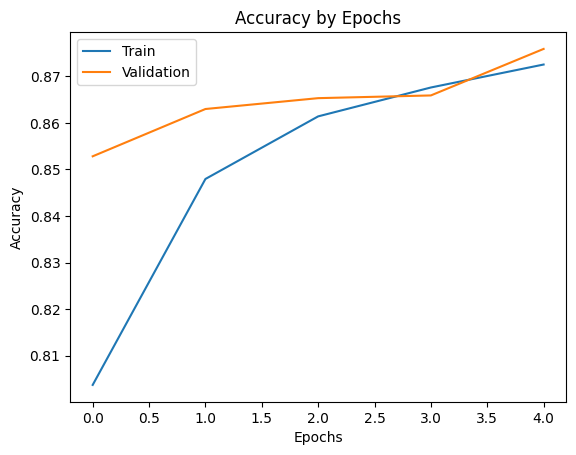

In [9]:
plt.plot(history_zeros.history["accuracy"])
plt.plot(history_zeros.history["val_accuracy"])
plt.title("Accuracy by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

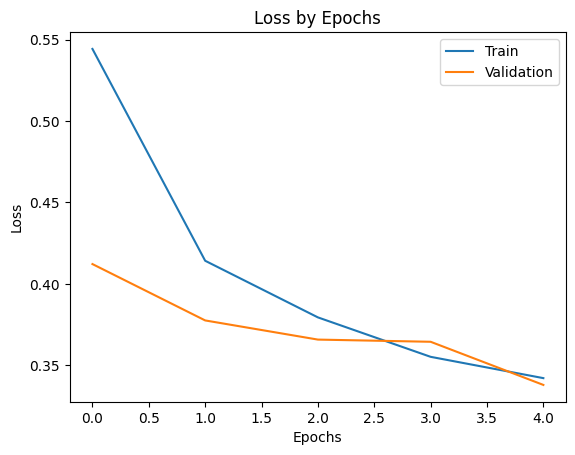

In [10]:
plt.plot(history_zeros.history["loss"])
plt.plot(history_zeros.history["val_loss"])
plt.title("Loss by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

#### Pesos Aleatórios

In [11]:
dense_weights_random = np.random.rand(
    dense_weights.shape[0], dense_weights.shape[1]
)  # Pode ocorrer Vanish Gradient (valores muito grandes ou muito pequenos)

model.layers[1].set_weights([dense_weights_random, dense_biases])

model.layers[1].get_weights()[0]

array([[7.7998078e-01, 3.6576554e-01, 9.9443305e-01, ..., 8.9591122e-01,
        6.1011326e-01, 9.8335755e-01],
       [8.3093911e-01, 9.8797476e-01, 6.3883789e-02, ..., 2.7672747e-01,
        7.2408026e-01, 2.2282022e-01],
       [7.1525604e-01, 9.7763115e-01, 5.8307362e-01, ..., 2.2261655e-01,
        6.2722629e-01, 7.7981651e-02],
       ...,
       [1.3550873e-01, 1.6995864e-02, 8.0517953e-04, ..., 2.3037708e-01,
        1.8388842e-01, 6.0000300e-01],
       [6.4602315e-01, 4.5996052e-01, 7.8448355e-01, ..., 2.4152823e-01,
        3.6376578e-01, 8.3164811e-01],
       [9.0283263e-01, 3.0219841e-01, 6.3972586e-01, ..., 5.2607292e-01,
        6.7669690e-01, 3.2177088e-01]], dtype=float32)

In [12]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history_random = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 98.8227 - accuracy: 0.4123 - val_loss: 21.9607 - val_accuracy: 0.6851
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 27.2841 - accuracy: 0.6270 - val_loss: 9.3956 - val_accuracy: 0.7493
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 11.9979 - accuracy: 0.6924 - val_loss: 5.1401 - val_accuracy: 0.7437
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 5.6636 - accuracy: 0.7239 - val_loss: 4.0416 - val_accuracy: 0.7656
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 3.0442 - accuracy: 0.7468 - val_loss: 2.1677 - val_accuracy: 0.7639


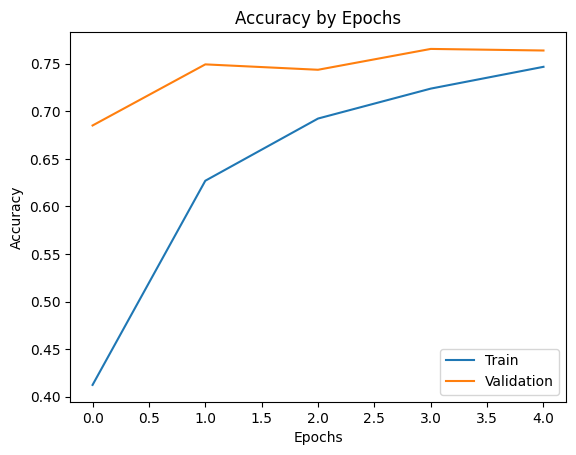

In [13]:
plt.plot(history_random.history["accuracy"])
plt.plot(history_random.history["val_accuracy"])
plt.title("Accuracy by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

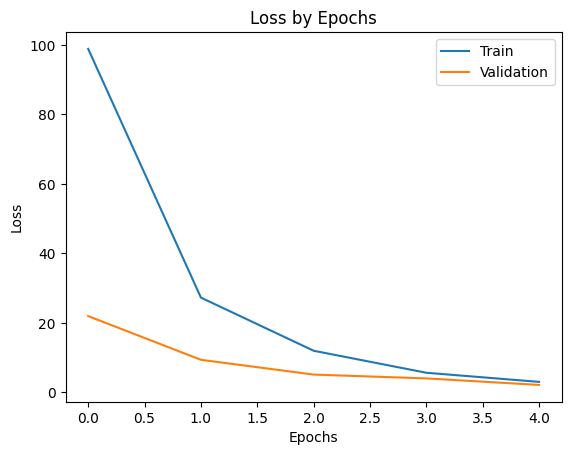

In [14]:
plt.plot(history_random.history["loss"])
plt.plot(history_random.history["val_loss"])
plt.title("Loss by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

#### Vieses Zerados

In [15]:
dense_biases_zeros = np.zeros(
    dense_biases.shape
)  # Iniciar a rede com os pesos de 0 = Manter Assimetria da Rede.

model.layers[1].set_weights([dense_weights, dense_biases_zeros])

model.layers[1].get_weights()

[array([[-2.4400759e-02,  1.9205280e-02, -7.8875586e-02, ...,
          9.6207643e-03,  4.4770502e-02,  4.7153536e-02],
        [ 3.6119126e-02, -9.6876569e-02, -2.5284708e-02, ...,
         -3.0693470e-03, -2.1242049e-02,  5.8787871e-02],
        [-2.6955839e-02, -1.2782259e-01, -5.2763682e-02, ...,
         -4.4514779e-02, -3.9689563e-02,  3.7980050e-02],
        ...,
        [-1.8839323e-03, -1.9055892e-02, -1.6809938e-02, ...,
          5.4566260e-02, -9.3747899e-02,  9.6060947e-02],
        [ 5.7063058e-02,  6.7744763e-03, -2.7138034e-02, ...,
          4.5780428e-02, -8.9821331e-02,  2.5391994e-02],
        [ 2.8387753e-02,  3.6795322e-02, -1.5001082e-02, ...,
          1.8129125e-05, -7.5108498e-02,  4.3631680e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [16]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history_zeros = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4331 - accuracy: 0.8441 - val_loss: 0.3930 - val_accuracy: 0.8594
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8645 - val_loss: 0.3668 - val_accuracy: 0.8622
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3446 - accuracy: 0.8737 - val_loss: 0.3543 - val_accuracy: 0.8749
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3283 - accuracy: 0.8794 - val_loss: 0.3354 - val_accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.8828 - val_loss: 0.3378 - val_accuracy: 0.8783


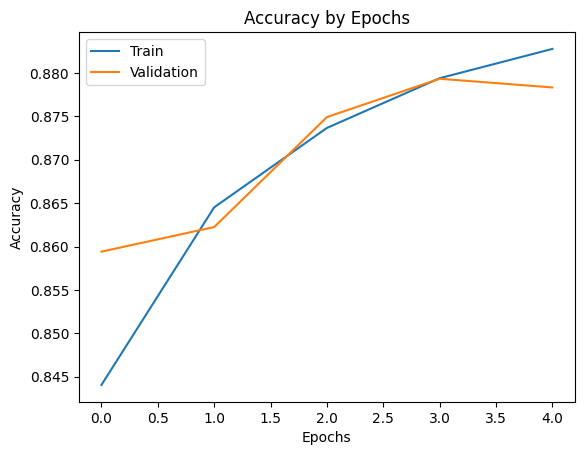

In [17]:
plt.plot(history_zeros.history["accuracy"])
plt.plot(history_zeros.history["val_accuracy"])
plt.title("Accuracy by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

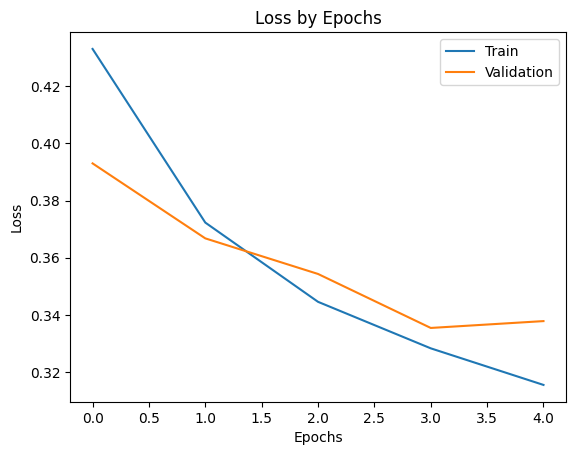

In [18]:
plt.plot(history_zeros.history["loss"])
plt.plot(history_zeros.history["val_loss"])
plt.title("Loss by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

#### Vieses Aleatórios

In [19]:
dense_biases_random = np.random.rand(
    dense_biases.shape[0]
)  # Pode ocorrer Vanish Gradient (valores muito grandes ou muito pequenos)

model.layers[1].set_weights([dense_weights, dense_biases])

model.layers[1].get_weights()

[array([[-2.4400759e-02,  1.9205280e-02, -7.8875586e-02, ...,
          9.6207643e-03,  4.4770502e-02,  4.7153536e-02],
        [ 3.6119126e-02, -9.6876569e-02, -2.5284708e-02, ...,
         -3.0693470e-03, -2.1242049e-02,  5.8787871e-02],
        [-2.6955839e-02, -1.2782259e-01, -5.2763682e-02, ...,
         -4.4514779e-02, -3.9689563e-02,  3.7980050e-02],
        ...,
        [-1.8839323e-03, -1.9055892e-02, -1.6809938e-02, ...,
          5.4566260e-02, -9.3747899e-02,  9.6060947e-02],
        [ 5.7063058e-02,  6.7744763e-03, -2.7138034e-02, ...,
          4.5780428e-02, -8.9821331e-02,  2.5391994e-02],
        [ 2.8387753e-02,  3.6795322e-02, -1.5001082e-02, ...,
          1.8129125e-05, -7.5108498e-02,  4.3631680e-02]], dtype=float32),
 array([-0.01107212,  0.04210759, -0.03018489,  0.06430177, -0.02321396,
        -0.07322845,  0.08539092,  0.09104706,  0.09065743,  0.03107886,
        -0.05132109,  0.08996853,  0.01403089,  0.13041633, -0.0189153 ,
        -0.0270608 ,  0.0306663

In [20]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history_random = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4081 - accuracy: 0.8507 - val_loss: 0.4331 - val_accuracy: 0.8329
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3645 - accuracy: 0.8654 - val_loss: 0.3779 - val_accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3430 - accuracy: 0.8728 - val_loss: 0.3464 - val_accuracy: 0.8733
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3241 - accuracy: 0.8820 - val_loss: 0.3420 - val_accuracy: 0.8764
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8833 - val_loss: 0.3421 - val_accuracy: 0.8796


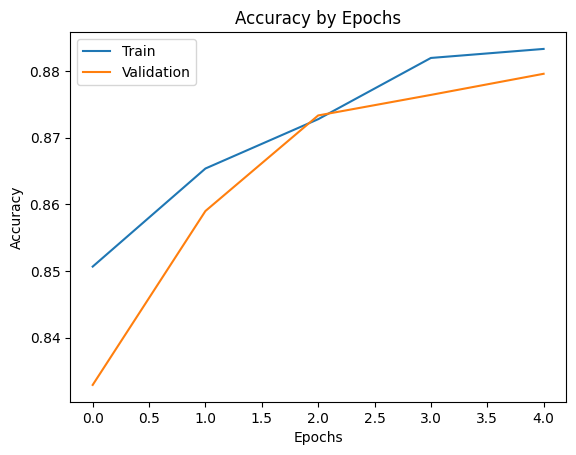

In [21]:
plt.plot(history_random.history["accuracy"])
plt.plot(history_random.history["val_accuracy"])
plt.title("Accuracy by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

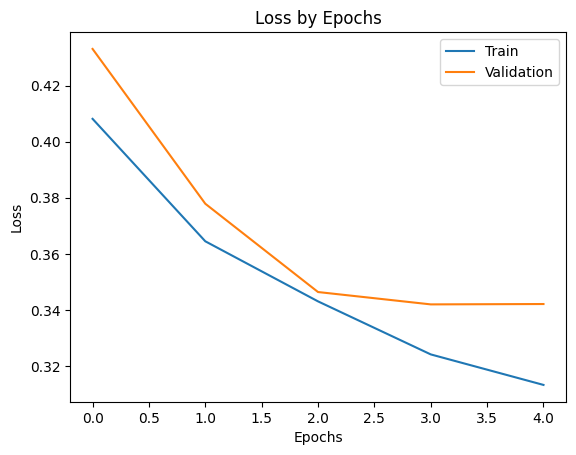

In [22]:
plt.plot(history_random.history["loss"])
plt.plot(history_random.history["val_loss"])
plt.title("Loss by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

### Configurações do Keras

In [23]:
model.get_config()

# GlorotUniform ou Inicialização de Xavier faz a distribuição dos pesos para inicialização.

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

# Predição do Modelo e Cálculo de Métricas

In [24]:
predicted = model.predict(x_test)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}\nTest Loss: {loss}")

  1/313 [..............................] - ETA: 17s

313/313 [==============================] - 0s 994us/step - loss: 74.3831 - accuracy: 0.8419
Test Accuracy: 0.8418999910354614
Test Loss: 74.38312530517578


### Visualização

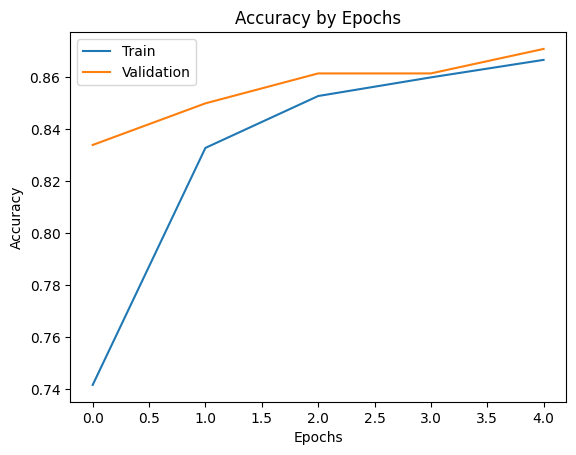

In [25]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

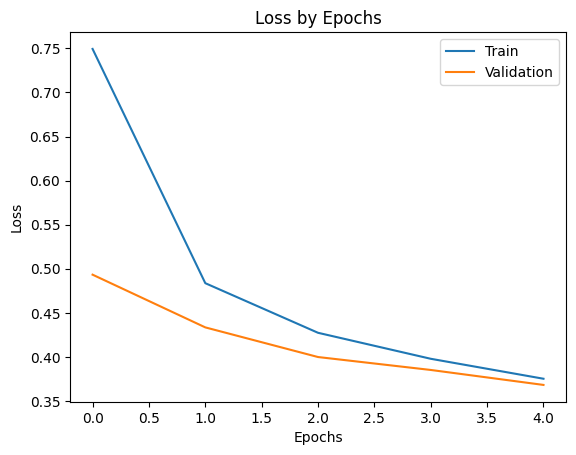

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss by Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

# Salvar e Carregar Modelos

In [27]:
model.save("model.h5")
model = load_model("model.h5")

c:\Users\jujun\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Teorias

### Propagação Direta (Forward Propagation)

Esta é a primeira etapa no aprendizado de uma Rede Neural. O processo envolve a passagem das informações de entrada através da rede, camada por camada, até chegar na saída. Durante a Propagação Direta, os dados de entrada são multiplicados pelos pesos correspondentes (inicialmente definidos aleatoriamente), somados com os respectivos vieses e passados por uma função de ativação para produzir a saída de cada neurônio. Este processo se repete sucessivamente, camada após camada, até se alcançar a última camada, onde a saída final da rede é produzida.

### Retropropagação (Backpropagation)

Esta é a segunda etapa no processo de aprendizado de uma Rede Neural. A Retropropagação começa depois que a saída final da rede é produzida na fase de Propagação Direta. Nesta etapa, a saída gerada é comparada com a saída desejada (ou seja, a "verdade verdadeira"), e a diferença entre ambas (o "erro") é calculada. Este erro é então propagado de volta pela rede, do fim para o início, ajustando os pesos e vieses dos neurônios ao longo do caminho com base em quanto eles contribuíram para o erro. O objetivo desse processo é minimizar o erro da saída da rede em relação à saída desejada. A Retropropagação é normalmente realizada várias vezes (durante várias "épocas" de treinamento) até que o erro da rede seja minimizado a um nível aceitável.

### Gradiente Descendente

Gradiente Descendente é um algoritmo de otimização usado para minimizar alguma função, encontrando localmente o ponto de menor inclinação (descida) e movendo-se nessa direção. No contexto de aprendizado de máquina, essa função é geralmente uma função de custo ou perda que queremos minimizar. O procedimento básico do Gradiente Descendente é calcular o gradiente (ou a derivada) da função de custo com relação aos parâmetros do modelo (pesos e vieses em uma rede neural, por exemplo) e então atualizar os parâmetros em direção ao negativo do gradiente (ou seja, a direção de maior descida). Este processo é repetido até que a função de custo seja minimizada até um certo ponto.

#### Gradiente Descendente Estocástico

Stochastic Gradient Descent (SGD) em inglês, é uma variação do algoritmo de gradiente descendente que calcula o gradiente e atualiza os parâmetros do modelo (por exemplo, pesos e vieses em uma rede neural) para cada amostra de treinamento, em vez de fazer isso para todo o conjunto de treinamento de uma só vez.

Em outras palavras, enquanto o gradiente descendente padrão (também conhecido como gradiente descendente em lote ou batch gradient descent) calcula o gradiente da função de custo após ter passado por todo o conjunto de treinamento, o GDE faz essa atualização após cada exemplo de treinamento.


### Momentum

Momentum é uma técnica que é usada para acelerar o treinamento em algoritmos de gradiente descendente. Ele faz isso ao adicionar uma fração do vetor de atualização do passo anterior ao vetor de atualização atual. A ideia é que, se o algoritmo de otimização está se movendo em uma direção particular, ele deve continuar se movendo nessa direção. Isto é análogo ao momento na física, onde um corpo em movimento tende a continuar se movendo na mesma direção. O Momentum ajuda a acelerar o Gradiente Descendente na direção relevante e amortece as oscilações, ajudando a superar os mínimos locais e os planaltos suaves, problemas comuns ao usar o gradiente descendente. Em termos de implementação, o Momentum é introduzido ao adicionar um termo à regra de atualização de parâmetro do gradiente descendente, onde esse termo é uma fração do passo de atualização do passo de tempo anterior.

Então, essencialmente, Gradiente Descendente é o algoritmo que nos permite minimizar nossa função de custo, e Momentum é uma técnica que podemos usar para fazer o gradiente descendente funcionar mais rápido e mais eficientemente.